In [1]:
import random
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


class move_analysis:
    def __init__(self, current_position, visited_positions, size):
        self.four_directions={
            "up":       {"x":current_position['x'],
                        "y":current_position['y']+1
            },
            "down":     {"x":current_position['x'],
                        "y":current_position['y']-1
            },
            "left":     {"x":current_position['x']-1,
                        "y":current_position['y']
            },
            "right":    {"x":current_position['x']+1,
                        "y":current_position['y']
            }
        }
        self.visited_positions=visited_positions
        self.size=size
        
    def checkWall(self):
        no_wall ={}
        hit_wall ={}
        for move in self.four_directions:
            if 0 <= int(self.four_directions[move]["x"]) < self.size and 0 <= int(self.four_directions[move]["y"]) < self.size:
                no_wall[move] = self.four_directions[move]
            else:
                hit_wall[move] = self.four_directions[move]

        moves = {
                "no_wall":no_wall,
                "hit_wall": hit_wall
                }
        return moves

  
    def move_already_made(self):
            legal ={}
            illegal ={}
            for move in self.four_directions:
                x = self.four_directions[move]["x"]
                y = self.four_directions[move]["y"]
                if (x, y) in self.visited_positions:
                    illegal[move] = self.four_directions[move]
                else:
                    legal[move] = self.four_directions[move]
            moves = {
                "legal":legal,
                "illegal": illegal
            }
            return moves

def saw(simulations, size):
    successes = 0
    failures = 0
    totalcount = 0
    position_visits = {}

    for i in range(simulations):
        visited_positions = set()
        position = {"x":50, "y":50}
        visited_positions.add((position["x"], position["y"]))
        if (position["x"], position["y"]) not in position_visits:
            position_visits[(position["x"], position["y"])] = 1
        else:
            position_visits[(position["x"], position["y"])] += 1

        _continue = True
        count = 0
        while _continue:
            count += 1
            legal_moves = move_analysis(position, visited_positions,size).move_already_made()['legal']
            legal_and_inbounds = move_analysis(position, visited_positions,size).checkWall()["no_wall"]
            possible_moves = {move: legal_moves[move] for move in legal_moves if move in legal_and_inbounds}

            if len(possible_moves) > 0:
                chosen_move = random.choice(list(possible_moves.keys()))
                position = possible_moves[chosen_move]
                visited_positions.add((position["x"], position["y"]))
                if (position["x"], position["y"]) not in position_visits:
                    position_visits[(position["x"], position["y"])] = 1
                else:
                    position_visits[(position["x"], position["y"])] += 1
            else:
                _continue = False
                failures += 1
                totalcount += count
    print("Failures: "+ str(failures)+" | Total Steps: "+ str(totalcount)+" | Average Steps: "+ str(totalcount/simulations))
    return position_visits, simulations, size


Failures: 100 | Total Steps: 6950 | Average Steps: 69.5


<AxesSubplot:>

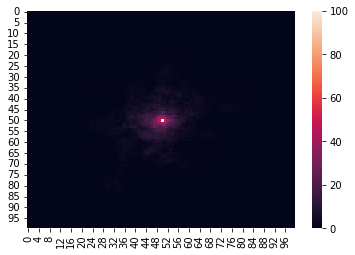

In [3]:
position_visits,simulations, size = saw(100, 100)
visits_2d = [[0 for _ in range(size)] for _ in range(size)]
for (x, y), visits in position_visits.items():
    visits_2d[x][y] = visits
visits_array = np.array(visits_2d)

sns.heatmap(visits_array)